In [1]:
import pandas as pd
import numpy as np

In [2]:
nba = pd.read_csv('players.csv')
print(nba)

                 Name Position            Team  Age  Height  Height_i  Weight  \
0      Juhann Begarin       SG  Boston Celtics   19   6' 5"      6.50     185   
1        Jaylen Brown       SG  Boston Celtics   24   6' 6"      6.60     223   
2           Kris Dunn       PG  Boston Celtics   27   6' 3"      6.30     205   
3      Carsen Edwards       PG  Boston Celtics   23  5' 11"      5.11     200   
4          Tacko Fall        C  Boston Celtics   25   7' 5"      7.50     311   
..                ...      ...             ...  ...     ...       ...     ...   
553      Juwan Morgan       SF       Utah Jazz   24   6' 7"      6.70     232   
554     Royce O'Neale       PF       Utah Jazz   28   6' 4"      6.40     226   
555       Olumiye Oni       SG       Utah Jazz   24   6' 5"      6.50     206   
556     Eric Paschall        F       Utah Jazz   24   6' 6"      6.60     255   
557  Hassan Whiteside        C       Utah Jazz   32   7' 0"      7.00     265   

        College      Salary

In [3]:
nba.drop(columns = ["Height_i"], inplace=True)
print(nba)

                 Name Position            Team  Age  Height  Weight  \
0      Juhann Begarin       SG  Boston Celtics   19   6' 5"     185   
1        Jaylen Brown       SG  Boston Celtics   24   6' 6"     223   
2           Kris Dunn       PG  Boston Celtics   27   6' 3"     205   
3      Carsen Edwards       PG  Boston Celtics   23  5' 11"     200   
4          Tacko Fall        C  Boston Celtics   25   7' 5"     311   
..                ...      ...             ...  ...     ...     ...   
553      Juwan Morgan       SF       Utah Jazz   24   6' 7"     232   
554     Royce O'Neale       PF       Utah Jazz   28   6' 4"     226   
555       Olumiye Oni       SG       Utah Jazz   24   6' 5"     206   
556     Eric Paschall        F       Utah Jazz   24   6' 6"     255   
557  Hassan Whiteside        C       Utah Jazz   32   7' 0"     265   

        College      Salary  Points  Rebounds  Assists  
0           NaN         NaN     NaN       NaN      NaN  
1    California  26758928.0    24

<Axes: >

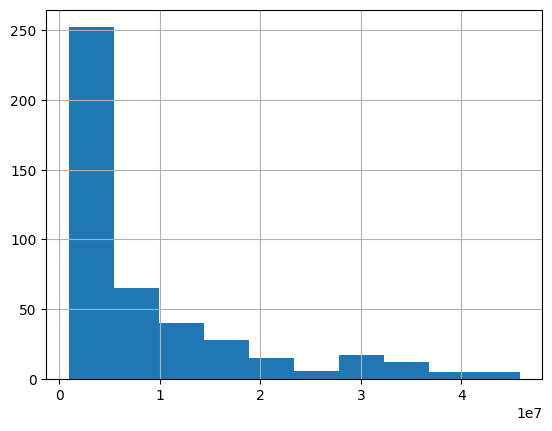

In [4]:
nba["Salary"].hist()

In [5]:
nba.dropna(inplace = True)
print(nba)

                 Name Position            Team  Age  Height  Weight  \
1        Jaylen Brown       SG  Boston Celtics   24   6' 6"     223   
2           Kris Dunn       PG  Boston Celtics   27   6' 3"     205   
3      Carsen Edwards       PG  Boston Celtics   23  5' 11"     200   
5      Bruno Fernando        F  Boston Celtics   23   6' 9"     240   
6          Al Horford        C  Boston Celtics   35   6' 9"     240   
..                ...      ...             ...  ...     ...     ...   
549     Elijah Hughes       SF       Utah Jazz   23   6' 5"     215   
552  Donovan Mitchell       SG       Utah Jazz   25   6' 1"     215   
554     Royce O'Neale       PF       Utah Jazz   28   6' 4"     226   
556     Eric Paschall        F       Utah Jazz   24   6' 6"     255   
557  Hassan Whiteside        C       Utah Jazz   32   7' 0"     265   

        College      Salary  Points  Rebounds  Assists  
1    California  26758928.0    24.7       6.0      3.4  
2    Providence   5005350.0     1

In [6]:
print(nba.shape)

(339, 11)


In [7]:
# weighti kg ye çevirme
nba["Weight"] = (nba["Weight"] * 0.453592).astype(int)
print(nba)
#height cm çevirme
height_as_cm = []
for i in nba["Height"]:
    ft_str, inc_str = i.replace("\'","").replace("\"","").split(" ")
    ft, inc = int(ft_str), int(inc_str)
    cm = int(ft*30.48 + inc * 2.54)
    height_as_cm.append(cm)
nba["Height"] = height_as_cm
print(nba["Height"])

                 Name Position            Team  Age  Height  Weight  \
1        Jaylen Brown       SG  Boston Celtics   24   6' 6"     101   
2           Kris Dunn       PG  Boston Celtics   27   6' 3"      92   
3      Carsen Edwards       PG  Boston Celtics   23  5' 11"      90   
5      Bruno Fernando        F  Boston Celtics   23   6' 9"     108   
6          Al Horford        C  Boston Celtics   35   6' 9"     108   
..                ...      ...             ...  ...     ...     ...   
549     Elijah Hughes       SF       Utah Jazz   23   6' 5"      97   
552  Donovan Mitchell       SG       Utah Jazz   25   6' 1"      97   
554     Royce O'Neale       PF       Utah Jazz   28   6' 4"     102   
556     Eric Paschall        F       Utah Jazz   24   6' 6"     115   
557  Hassan Whiteside        C       Utah Jazz   32   7' 0"     120   

        College      Salary  Points  Rebounds  Assists  
1    California  26758928.0    24.7       6.0      3.4  
2    Providence   5005350.0     1

In [8]:
#ortalama maaş
salary_mean = nba["Salary"].mean()
print(salary_mean)

9316527.123893805


In [9]:
# genç ile yaşlı oyuncuların maaş ortalaması 
age_mean = nba["Age"].mean()
olds = nba.loc[nba["Age"] >= age_mean]
youngs = nba.loc[nba["Age"] < age_mean]
olds_mean = olds["Salary"].mean()
youngs_mean = youngs["Salary"].mean()
print(olds_mean, youngs_mean)

12636681.12 6681484.26984127


In [10]:
# En değerli oyuncular hangi pozisyonda oyunuyor
most_valuable_players = nba.sort_values("Salary", ascending=False).iloc[:100]
most_valuable_players["Position"].value_counts()

Position
PG    26
SG    25
SF    20
PF    16
C     12
G      1
Name: count, dtype: int64

In [12]:
# En uzun 20 oyuncunun aldığı maaşların ortalaması nedir?
en_uzun_20 = nba.sort_values(by = "Height", ascending = False).head(20)
ortalama = en_uzun_20["Salary"].mean()
print(ortalama)

9503176.15


In [15]:
# Her oyuncu için points, rebounds ve assists skorlarının toplamını, Total Score adında yeni bir kolon olarak ekleyin.
nba["Total_Score"] = nba["Points"] + nba["Rebounds"] + nba["Assists"]
print(nba)

                 Name Position            Team  Age  Height  Weight  \
1        Jaylen Brown       SG  Boston Celtics   24     198     101   
2           Kris Dunn       PG  Boston Celtics   27     190      92   
3      Carsen Edwards       PG  Boston Celtics   23     180      90   
5      Bruno Fernando        F  Boston Celtics   23     205     108   
6          Al Horford        C  Boston Celtics   35     205     108   
..                ...      ...             ...  ...     ...     ...   
549     Elijah Hughes       SF       Utah Jazz   23     195      97   
552  Donovan Mitchell       SG       Utah Jazz   25     185      97   
554     Royce O'Neale       PF       Utah Jazz   28     193     102   
556     Eric Paschall        F       Utah Jazz   24     198     115   
557  Hassan Whiteside        C       Utah Jazz   32     213     120   

        College      Salary  Points  Rebounds  Assists  Total_Score  
1    California  26758928.0    24.7       6.0      3.4         34.1  
2    Pr

In [22]:
# Total Score bazında en başarılı 20 oyuncunun kaç tanesi hangi College'tan mezundur (3 tanesi A'dan, 8 tanesi B'den gibi)?
most_players_20 = nba.sort_values("Total_Score", ascending=False).head(20)
most_players_20["College"].value_counts()

College
Kentucky           3
Duke               3
UCLA               2
Davidson           1
Arizona State      1
Kansas             1
Weber State        1
Florida            1
Texas              1
USC                1
Oklahoma           1
San Diego State    1
Louisville         1
Marquette          1
Fresno State       1
Name: count, dtype: int64

In [36]:
# DataFrame'lerin unique() metodunu kullanarak kaç farklı Team olduğunu bulun.
total_team = nba["Team"].nunique()
total_team_name = nba["Team"].unique()
print(total_team)
print(total_team_name)

30
['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia Sixers'
 'Toronto Raptors' 'Chicago Bulls' 'Cleveland Cavaliers' 'Detroit Pistons'
 'Indiana Pacers' 'Milwaukee Bucks' 'Atlanta Hawks' 'Charlotte Hornets'
 'Miami Heat' 'Orlando Magic' 'Washington Wizards' 'Golden State Warriors'
 'Los Angeles Clippers' 'Los Angeles Lakers' 'Phoenix Suns'
 'Sacremento Kings' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Denver Nuggets' 'Minnesota Timberwolves' 'Oklahoma City Thunder'
 'Portland Trail Blazers' 'Utah Jazz']


In [38]:
# Her bir Team için toplam kadro değerlerini hesaplayın (for loop ile).
team_name = nba["Team"].unique()
for team in team_name:
        total_salary = nba[nba['Team'] == team]['Salary'].sum()
        print(f"{team} takımının toplam kadro değeri: {total_salary}")

Boston Celtics takımının toplam kadro değeri: 136192621.0
Brooklyn Nets takımının toplam kadro değeri: 163974659.0
New York Knicks takımının toplam kadro değeri: 117297022.0
Philadelphia Sixers takımının toplam kadro değeri: 134081752.0
Toronto Raptors takımının toplam kadro değeri: 106161388.0
Chicago Bulls takımının toplam kadro değeri: 131244882.0
Cleveland Cavaliers takımının toplam kadro değeri: 96391831.0
Detroit Pistons takımının toplam kadro değeri: 69762615.0
Indiana Pacers takımının toplam kadro değeri: 104747655.0
Milwaukee Bucks takımının toplam kadro değeri: 107171816.0
Atlanta Hawks takımının toplam kadro değeri: 68325162.0
Charlotte Hornets takımının toplam kadro değeri: 91640416.0
Miami Heat takımının toplam kadro değeri: 129465797.0
Orlando Magic takımının toplam kadro değeri: 80666571.0
Washington Wizards takımının toplam kadro değeri: 107490799.0
Golden State Warriors takımının toplam kadro değeri: 128604321.0
Los Angeles Clippers takımının toplam kadro değeri: 14031

In [46]:
# Her oyuncunun Beden Kitle Endeksini hesaplayın ve en fit 10 oyuncuyu bulun. Formül: weight in kg / (height in meter)²
nba["Beden_Kitle_Indeksi"] = (nba["Weight"] / ((nba["Height"] / 100) * 2))
fit_10 = nba.sort_values("Beden_Kitle_Indeksi", ascending=False).head(10)
print("En fit 10 oyuncu: ", fit_10)

En fit 10 oyuncu:                     Name Position                   Team  Age  Height  Weight  \
449     Zion Williamson       PF   New Orleans Pelicans   21     200     128   
540      Udoka Azubuike        C              Utah Jazz   21     208     127   
68       Andre Drummond        C    Philadelphia Sixers   28     208     126   
69          Joel Embiid        C    Philadelphia Sixers   27     213     127   
182         Brook Lopez        C        Milwaukee Bucks   33     213     127   
257         Robin Lopez        C          Orlando Magic   33     213     127   
211    Vernon Carey Jr.        C      Charlotte Hornets   20     205     122   
39        Jahlil Okafor        C          Brooklyn Nets   25     208     122   
248  Wendell Carter Jr.        C          Orlando Magic   22     208     122   
506      Derrick Favors        C  Oklahoma City Thunder   30     205     120   

          College      Salary  Points  Rebounds  Assists  Total_Score  \
449          Duke  10733400